# JSONata

JSONata é uma linguagem de consulta e transformação leve, mas poderosa, projetada para trabalhar com dados JSON. Inspirada no XPath, ela permite que você extraia e manipule informações de estruturas JSON complexas de forma eficiente e concisa.

## Principais Características

* **Combinação de XPath e Notação JSON**: JSONata combina a flexibilidade do XPath com a simplicidade da notação JSON, tornando-a fácil de aprender e usar.

* **Consultas e Transformações Complexas**: Permite realizar consultas complexas, filtrar dados, transformar estruturas JSON e realizar cálculos com facilidade.

* **Expressões Concisas**: JSONata utiliza expressões concisas e intuitivas, reduzindo a necessidade de escrever código extenso.

* **Manipulação de Dados Eficiente**: Projetada para lidar com grandes volumes de dados JSON de forma eficiente, tornando-a ideal para aplicações que exigem alto desempenho.

## Funcionamento no ASL

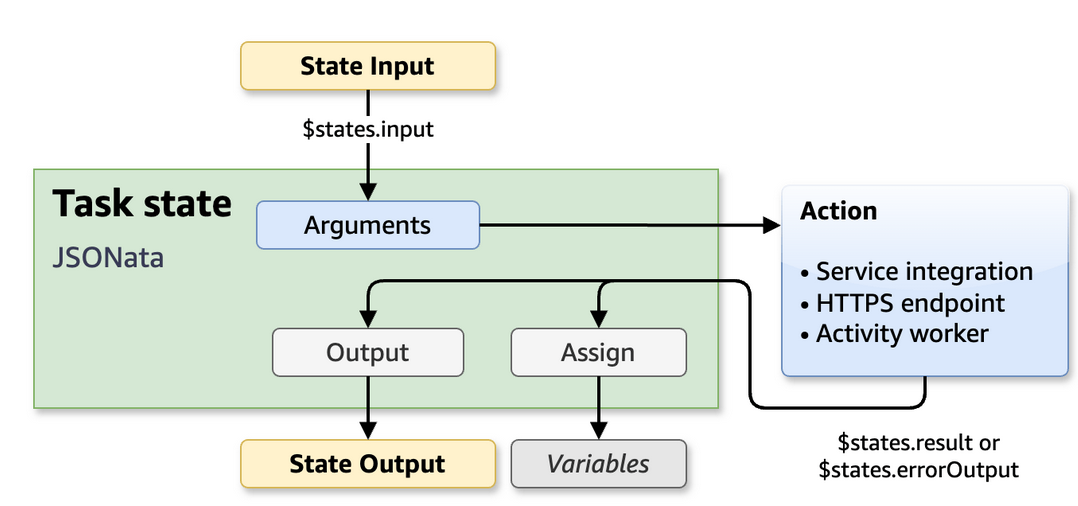

Arguments: permite customizar o que será passado para o State como input

Output: podemos transformar o output do State

Assign: podemos armazenar resultados em variáveis. suportado nos seguintes tipos de States: Pass, Task, Map, Parallel, Choice, Wait

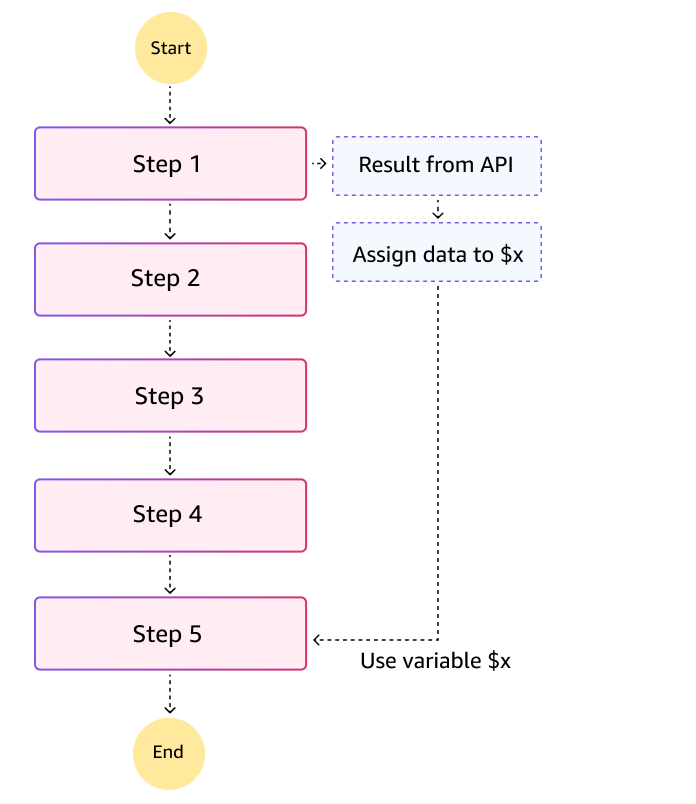

## Estruturas de Dados

JSONata lida com dois tipos principais de estruturas de dados JSON:

### 1. Objects (Objetos)

* Análogos a **dicionários** em Python.

* Acesso aos valores por meio de dot notation, em vez de colchetes.

* **Importante**: **Erros** em consultas a objetos não resultam em erros, mas sim em **valores nulos**.

* **Acesso a propriedades com caracteres especiais:**

    * Propriedades com espaços ou caracteres reservados como `?` e `$` devem ser acessadas entre crases (`` ` ``).

    * **Exemplo:**
        ```json
        {
            "nome do produto": "Laptop",
            "preço?": 1200,
            "informação$extra": "Garantia de 2 anos"
        }
        ```
        
        * Para acessar "preço?": `` `preço?` ``

        * Para acessar "informação$extra": `` `informação$extra` ``

### 2. Arrays (Matrizes)

* Análogos a listas em python.

* Acesso aos elementos por index.

* **Tratamento de Índices**:

    * Índices do tipo float são convertidos para o **menor inteiro mais próximo**.

    * Valores **não numéricos** são tratados como **predicados (filtros)**.

* **Seleção de Ranges**:

    * **`Array[[início..fim]]`** para selecionar um **intervalo de elementos** (início e fim inclusivos).
    
    * **Exemplos:**
        ```json
        [
          "maçã",
          "banana",
          "laranja",
          "uva",
          "melancia",
          "abacaxi",
          "morango"
        ]
        ```
        * `$[[2..4]]`: `["laranja", "uva", "melancia"]`
        * `$[[0..2]]`: `["maçã", "banana", "laranja"]`
        * `$[[4..6]]`: `["melancia", "abacaxi", "morango"]`
        * `$[[3..]]`: `["uva", "melancia", "abacaxi", "morango"]`
        * `$[[..3]]`: `["maçã", "banana", "laranja", "uva"]`

* **Acesso a Arrays Root**:
    
    * Arrays que não estão dentro de objetos podem ser acessadas usando o símbolo `$`, que representa a raiz do JSON.

    * **Exemplo**:
        ```json
        [
          {
            "nome": "João",
            "idade": 30,
            "endereço": {
              "cidade": "São Paulo",
              "país": "Brasil"
            },
            "hobbies": ["leitura", "música"]
          },
          {
            "nome": "Maria",
            "idade": 25,
            "endereço": {
              "cidade": "Nova York",
              "país": "EUA"
            },
            "hobbies": ["corrida", "viagem"]
          },
          {
            "nome": "Pedro",
            "idade": 35,
            "endereço": {
              "cidade": "Londres",
              "país": "Reino Unido"
            },
            "hobbies": ["fotografia", "cozinha"]
          }
        ]
        ```
        * `$[1].nome`: `"Maria"`
        * `$.idade`: `[30, 25, 35]`
        * `$[0].endereço.cidade`: `"São Paulo"`
        * `$[2].hobbies[0]`: `"fotografia"`
        * `$.endereço.país`: `["Brasil", "EUA", "Reino Unido"]`
        * `$[idade > 30].nome`: `["Pedro"]`
        * `$.hobbies[]`: `["leitura", "música", "corrida", "viagem", "fotografia", "cozinha"]`

# Amazon States Language (ASL)

## Overview

**Uma State Machine consiste de um workflow que define uma serie de etapas em um processo**. Elas trazem consigo as seguintes features:

* Permite a criação visual de workflows complexos;

* Facilita o gerenciamento de workflows;

* Facilita a construção de aplicações, processos de automação e orquestração de microsserviços;

* São definidas em Amazon States Languages (ASL)

**A representação de uma State Machine é feita por meio de objetos JSON.** Logo, toda State Machine se trata de uma composição de um ou mais States.

Uma **operação** de uma State Machine é feita especificada fazendo uso de **States**, os quais são os JSON objects.

**Os States são definidos na seção `"States"` no início (top-level) do objeto.**

Um exemplo básico pode ser dado com:

```json
{
  "Comment": "A simple minimal example of the States language",
  "StartAt": "Hello World",
  "States": {
    "Hello World": {
      "Type": "Task",
      "Resource": "arn:aws:lambda:us-east-1:123456789012:function:HelloWorld",
      "End": true
    }
  }
}
```

O qual descreve a execução de uma função Lambda denominada de HelloWorld.

Ele contém somente um State, logo, somente uma operação é realizada.

Podemos observar que um comentário no top-level descrevendo o uso dessa State Machine

**`"StartAt"` descreve onde se inícia o fluxo de execução dessa State Machine.**

Sua execução segue o seguinte procedimento:

1.  State Machine é executada;

2.  O interpreter faz a análise e identifica onde se inicia o processo pelo `"StartAt"`;

3.  Executa o `"StartAt"`;

4.  Finaliza a execução do `"StartAt"`;

5.  Faz a checagem se há, nesse estado, uma marcação de End State denotada por **`"End"`**;

6.  Caso haja a definição de um `End`, finaliza-se a execução. Caso contrário, busca pelo próximo State a ser executado e atribuído à Transition **`"Next"`** (ou um **`"Default"`**, no caso de um `Choice State`);

7.  Em situações onde há definição de `"Next"` ou `"Default"`, se dá sequencia à execução;

8.  As etapas 6 e 7 são executadas até que se chegue num State denominado de `Terminal State`, o qual retorna um status de execução (Succeed, Fail ou End State), ou até que seja detectado um erro.

## Top-level

Componentes:

*   `"States"` representa os States. é um **JSON object**.

*   `"StartAt"` representa onde se inicia o fluxo. **é uma String**.

*   `"QueryLanguage"` [OPCIONAL] define a linguagem usada ao longo da State Machine, uma vez que **pode ser JSONata ou JSONPath**, facilitando debugs. **Por padrão é JSONata**.

*   `"Comment"` [OPCIONAL]

*   `"Version"` [OPCIONAL] define a **versão da linguagem** usada na escrita da State Machine. Pode ser sobrescrita para um State específico usando esse mesmo key-pair.

*   `"TimeoutSeconds"` [OPCIONAL] define o **tempo máximo de execução da State Machine em segundos**. Se excedido o tempo, um erro **`States.Timeout`** é reportado.

## States

Descrevem unidades de trabalho (e.g. Task) ou um específico fluxo de controle (e.g. Choice State)

**São representados dentro do top-level `"States"` object**.

**Seu nome deve ser único dentro do escopo da State Machine**.

O limite de caracteres que define seu nome é de **80 Unicode**.

### Composição

Sua composição pode possuir campos adicionais dependendo do tipo

Estrutura generalista de um State:

*   `"Type"` define o tipo do State (Task, Choice, Pass, Map, Succeeded,Fail, Wait);

*   `"Comment"` [OPCIONAL];

*   `"QueryLanguage"` [OPCIONAL] permite sobrescrever a linguagem definida no top-level. Por padrão é o do top-level;

*   `"End"` [OPCIONAL SE NÃO POSSUIR NEXT] valor booleano que indica o fim da State Machine se definido como `true`.

## Tipos de State

### Task State

são States de executáveis, como uma Lambda ou StepFunction

tem em sua composição:

*   **"Type"** deixa explícito que se trata de uma Task State;

*   **"Resource"** traz o ARN do executável a ser usado

*   **"End"** [OPCIONAL] finaliza a State Machine

*   **"Next"** [OPCIONAL] indica o próximo State a ser executado

*   **"Retry"** [OPCIONAL] uma **Array** contendo Objects que permite definir como será feita a execução em casos de erros específicos. Tem em sua composição os seguintes fields:

    *   **"ErrorEquals**" uma **Array** que permite definir como cada tipo ou um conjunto de erros serão tratados
    
    *   **"BackoffRate"** permite definir quanto aumentará o tempo de um retry para outro

    *   **"MaxAttempts"** numero maximo de retentativas que podem ser feitas para os erros

    *   **"IntervalSeconds"** tempo que será aguardado para uma nova retentativa

    *   **"Next"**

    ```json
    "Retry": [
        {
          "ErrorEquals": [
            "States.ALL"
          ],
          "IntervalSeconds": 3,
          "MaxAttempts": 2,
          "BackoffRate": 1.5
        }
    ]
    ```

*   **"Catch"** [OPCIONAL] **Array** que permite definir como erros serão lidados durante a execução da Task State. se trata de uma Array contendo Objects que por sua vez podem conter os seguintes fields:

    *   **"ErrorEquals""** consiste numa Array que especifica os errors usando `States.`

    *   **"Next"** especifica o que deve ser executado em sequência

podemos ter dois tipos de Task States:

+ Activity Task
    
    + **permite trabalhar com "serviços externos" à AWS**, por exemplo, uma aplicação de consumo de API hospedada em qualquer lugar

    + **activity workers** são como são chamados tais "serviços externos" 

+ Service Task

    + permite fazer **consumo de API de serviços AWS** para executar tarefas específicas

#### JSONata

*   **"Arguments"** [OPCIONAL, **JSONata**]

*   **"Output"** [OPCIONAL, **JSONata**]

#### JSONPath

*   **"InputPath"** [OPCIONAL, **JSONPath**] é um **JSON Object** **permite filtrar o input** a ser usado pelo State **antes de ser processado pelo State reduzindo seu tamanho, otimizando o processamento**. se usado, somente os valores filtrados serão passados do InputPath em diante.

*   **"Parameters"** [OPCIONAL, **JSONPath**] permite **controlar e manipular o input passado a esta Task State**. Por se tratar de um **JSON object** ele aceita field internos definidos pelo usuário. **cria um novo input que será utilizado pelo Task State**. **permite incorporar novos pares de Fields:Values e também o uso de valores do Context Object**

*   **"ResultSelector"** [OPCIONAL, **JSONPath**] permite **selecionar e/ou filtrar somente a porção de interesse do output do serviço/atividade**. caso usado com finalidade de filtração, somente os valores selecionados serão passados ao ResultPath em diante. é **executado antes** de **"ResultPath"**. **disponível em Task, Map e Parallel States**

*   **"ResultPath"** [OPCIONAL, **JSONPath**] permite **controlar a combinação do input e do ResultSelector** que serão passadas para o Output do State

*   **"OutputPath"** [OPCIONAL, **JSONPath**] permite **filtrar o Output de um State para ser passado a outro State**. por padrão é **$**

***um Output é o JSON final do resultado de um State, enquanto o Result é o seu resultado bruto, que consiste na junção do input e output. fazendo uma analogia, é o mesmo que comparar `__str__` com `__repr__` em Python***

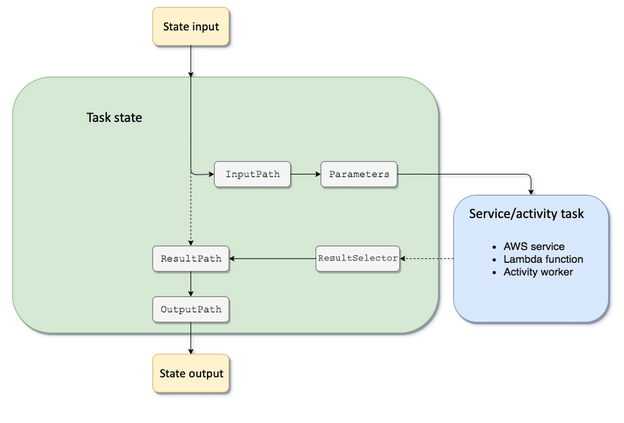

### Choice State

usado para definição de condicionais

*   **"Choices"** se trata de uma Array de JSON Objects onde cada JSON Object é uma condição

    *   **"StringEquals"**

    *   **"Value"**

### Terminal State

usado para reportar o status de uma run da State Machine e findá-la

pode ser do tipo:

*   **"Succeed"**;

*   **"Fail"**;

*   **"End"**.

### Parallel State

permite paralelizar States de modo a aumentar a performance da State Machine paralelizando States que independem entre si

### Map State

realiza a iteração elemento por elemento

podemos ter dois modos de processamento: **INLINE e DISTRIBUTED**

**o modo é definido entro do campo `ProcessorConfig` no subcampo `Mode`, por padrão é INLINE**

o modo **INLINE** apresenta **concorrência limitada**, onde **cada iteração do Map é executada no contexto da State Machine**. a StepFunctions faz o **armazenamento do historico de execução nesse modo no workflow**

conceitos do modo DISTRIBUTED:

+ parent workflow: um workflow que contém o Map State no modo DISTRIBUTED

+ child workflow: uma iteração do Map State. tem seu próprio histórico de execução, separado do parent workflow

+ map run: um recurso criado na execução do Map. se trata de um conjunto de execuções de child workflows e as configurações que controlam essas execuções. possuem um ARN próprio. pode ser inspecionada usando DescribeMapRun API ou via console. MapRuns emitem métricas para o CloudWatch Metrics, mas podemos ver as métricas de cada child workflow

o modo **DISTRIBUTED** apresenta a vantagem de suportar **maior concorrência** e **cada iteração é considerada como uma execução como independente do workflow** que a invoca

**o modo DISTRIBUTED por executar cada iteração de modo independente podemos definir tipos de execução a eles como STANDARD e EXPRESS dentro de `ProcessorConfig` usando o subcampo `ExecutionType`**

**o modo INLINE é adequado em situações onde o historico de execução do workflow não excede 25.000 entradas ou não precisa de mais de 40 iterações concorrentes**

o modo DISTRIBUTED é adequado em situações onde ao menos um dos pontos abaixo é observado:

+ o tamanho do input excede 256 KiB
+ o historico de execução do workflow pode exceder 25.000 entradas
+ necessitamos de uma concorrencia superior a 40

a diferença entre os modos se dá também nos formatos de input aceitos:

+ INLINE: somente JSON provido do state anterior

+ **DISTRIBUTED: aceita além do JSON do state anterior, arquivos JSON que contem uma array e CSV do S3, lista de objetos do S3 e S3 inventory**


*   ****
Fields:

*   **`"ItemProcessor"`** (antigo "Iterator") é um JSON Object que permite definir uma State Machine que irá processar cada Item ou batelada de Items de uma Array

*   **`"ItemReader"`** é um JSON Object que define **onde os Items devem ser lidos** ao invés do Input efetivo

*   **`"ItemBatcher"`** um JSON Object que especifica **como passar os Items para o ItemProcessor** em batelada

*   **`"ResultWriter"`** um JSON Object que especifica **onde devem ser escritos os resultados de cada Item** ao invés do State Result

*   **`"MaxConcurrency"`** especifica o número de execuções em paralelo máximo que o Map State poderá fazer

*   **`"ToleratedFailurePercentage"`** integer que define um **percentual máximo de erro permitido** para falhas de Items

*   **`"ToleratedFailureCount""`** análogo ao anterior porém **em termos de contagem**

*   **`"ItemSelector"`** (antigo "Parameters") JSON Object que sobrepõe cada elemento da Items Array. podemos usá-lo quando queremos passar no Map outros valores dinâmicos, além do Item

```json
"ItemSelector": {
    "parcel.$": "$$.Map.Item.Value",
    "courier.$": "$.delivery-partner"
  }
```

#### JSONata

*   **`"Items"`** se trata de uma JSON Array ou uma JSONata String, que pode gerar uma JSON Array, definindo quais os Items a serem processados

*   **`"Output"`**

```json
"Validate-All": {
  "Type": "Map",
  "QueryLanguage": "JSONata",
  "Items": "{% $states.input.detail.shipped %}",
  "MaxConcurrency": 0,
  "ItemProcessor": {
    "StartAt": "Validate",
    "States": {
      "Validate": {
        "Type": "Task",
        "Resource": "arn:aws:lambda:us-east-1:123456789012:function:ship-val",
        "End": true
      }
    }
  },
  "Assign": {
    "shipped": "{% $states.result %}"
  },
  "Output": {
    "numItemsProcessed": "{% $count($states.input.detail.shipped) %}"
  },
  "End": true
}
```

#### JSONPath

*   **`"ItemsPath"`** define onde se encontram os Items a serem processados dentro do Input

*   **`"ResultSelector"`** deve seguir um template de Payload

*   **`"ResultPath"`**

*   **`"OutputPath"`**

### Pass State

comumente usado para realizar ajustes de Input/Output de um State para outro

a principio ele nao performa nenhuma operação sobre o Input

### Wait State

faz com que um delay de tempo seja implementado de modo pre definido

## Transitions

**Tem como função fazer a conexão e definir a ordem de execução dos States**.

**Especificado pelo field `"Next"` que possui o nome do próximo State a ser executado escrito idênticamente ou `"End"`.**

**Todos os States que não são terminais devem conter um campo `"Next"`**.

## Timestamps

**Choice e Wait States lidam com valores de JSON fields que representam timestamps.**

O padrão de timestamp deve seguir a ISO 8601, possuindo o seguinte padrão: **"2016-03-14T01:59:00Z"**

## Data

O interpreter tem como um de suas funções a transmissão de dados de um State para outro com o intuito de performar cálculos (`Task`) ou controlar (Choice State), de modo dinâmico, o fluxo da State Machine.

**Todos os dados DEVEM ser transmitidos no formato JSON**.

**A referência para dados expressos em JSON é "JSON text"**.

Ao iniciar a execução da State Machine um JSON text é passado como input.

**Se um JSON text input não for passado, um JSON object (`{}`) vazio é usado por padrão**.

Conforme ocorre a execução de cada State, cada State recebe um JSON text como input gerando um JSON text como output.

**Quando dois States estão interligados via Transition, o input do primeiro é o output da segunda**.

**O output de um Terminal State é tratado com o output da State Machine**.

## Context Object

**Se trata de metadados da State Machine que podem ser acessados**

inclui informações a respeito de:

*   State Machine

*   State

*   Execução

*   Task

podemos acessar seus valores nos seguintes Fields e ocasiões:

*   InputPath

*   ResultSelector

*   OutputPath

*   ItemsPath (no caso de Map States)

*   Variáveis (no caso de Choice States)

*   Comparações entre variáveis usando operadores

## Tratamento de Erros

os possíveis tipos de erros são:

*   RuntimeError: ocorre geralmente em situações onde o erro foi **detectado na execução da State Machine** e não foi possível lidar com ele durante a execução. **este tipo de erro não pode ser tratado via "Retry"**

*   TimeoutError: ocorre quando a execução ultrapassa o limiar de tempo dado a ela via **Field "TimeoutSeconds"** ou falhou ao enviar um heartbeat por um período de tempo superior ao passado em **Field "HeartbeatSeconds"**

*   FailureError: retornado quando uma Task State teve erro em sua execução

para tratarmos tais erros, podemos usar o Field discutido anteriormente denominado de **"Retry"**, o qual **é uma Array de JSON Objects**

cada JSON Object é uma forma de fazer retry com configurações específicas

os tipos de erros são passados dentro de "ErrorEquals", o qual é uma Array de Strings, onde as Strings são os erros a serem detectados

para especificar os erros é usada a **notação "States.(erro)"**, onde erro pode ser:

*   ALL: detecta qualquer motivo de erro

*   Runtime: detecta erros de Runtime **(está controverso no curso)**

*   TaskFailed: detecta erros que ocorreram na execução de um Task State

## Linguagens

**O interpreter deve conseguir usar JSONPath ou JSONata. Ele pode suportar outras linguagens**.

**Se um Map ou Parallel State tem uma linguagem específica em uso, esta não é automaticamente propagada para os States internos a ela**. Tais States adotam como padrão a linguagem da State Machine.

## State Machine Variables

Se trata de um valor JSON nomeado.

**Um State pode ter em sua estrutura a declaração via `"Assign"` de uma variável a qual pode ser usada por um State subsequente**.

## Intrinsic Functions

presentes somente quando usado JSONPath como linguagem

### States.Format

realiza a interpolação de variaveis em Strings

o placeholder de cada variável é definida por **{}**

*   primeiro arg: uma String que se deseja realizar a interpolação

*   demais args: as variáveis/valores dinâmicos que devem ser inseridos

### States.StringToJson

realiza a formatação de uma String para JSON

**aceita um único valor** sendo este a String a ser convertida

**retorna a String formatada em JSON**

### States.JsonToString

aceita somente um valor

**recebe um path definindo um JSON e retorna a string identificada por este path**

### States.Array

aceita de 0 a mais argumentos

**retorna uma Array composta dos elementos dados como argumento**

## Boas Práticas

1.  **Filtrar somente o que é necessário** para ser usado como Input do State seguinte via ResultPath/OutputPath

2.  **Fazer uso ao máximo das expressões nativas** da linguagem usada, evitando códigos customizados

3.  **Reduzir o uso de Transitions ao máximo possível usando funções instrinsecas do ASL**. Podem ser usadas dentro de ResultSelector no caso de Task States ou em Parameters ou ResultSelector no caso de um Pass State

4.  **Passar o input original para tratamento de erros**, como por exemplo, "Catch" e "ResultPath". Map e Parallel States aceitam também o uso de Catch, desse modo podemos implementar soluções robustas

5.  **Fazer uso de timeouts** evitando execuções "emperradas"

    ```json
    "ActivityState": {
    "Type": "Task",
    "Resource": "arn:aws:states:us-east-1:123456789012:activity:HelloWorld",
    "TimeoutSeconds": 300,
    "HeartbeatSeconds": 60,
    "Next": "NextState"
    }
    ```

6.  **Passar ARN de recursos ao invés dos próprios payloads** deste modo evitamos de passar o limite de 262,144 bytes

    ```json
    {
    "Data": "arn:aws:s3:::MyBucket/data.json"
    }
    ```

7.  **Evitar chegar ao limite de quotas de 25,000 entradas do AWS Serivice Quotas no histórico de execução** pois, se caso isso ocorrer não há como aumentar este valor. Uma maneira de se evitar é por meio de **implementação de segmentação da densa State Machine** em chamadas a outras StepFunctions, **evitando esta limitação de uma longa execução concentrada em uma unica StepFunction**
    
8.  **Tratar possíveis erros de Lambda**. Lambda podem ter cerca de 500 erros possíveis, assim, tratá-los de modo particular pode beneficar o desempenho e debug da State Machine via Retry e/ou Catch

    ```json
    "Retry": [ {
    "ErrorEquals": [ "Lambda.ServiceException", "Lambda.AWSLambdaException", "Lambda.SdkClientException"],
    "IntervalSeconds": 2,
    "MaxAttempts": 6,
    "BackoffRate": 2
    } ]
    ```

9.  **Evitar latência quando feita checagem de status de Activity Tasks**